<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>This notebook will introduce you to the Visual Behavior dataset. 

<p>Our goal is to see if we can decode stimulus identity from the activity of a population of neurons
</div>

In [1]:
# import these modules to get started
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')
     
%matplotlib inline
%load_ext autoreload

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>The main entry point is the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata as needed and storing it in well known locations.  For this workshop, all of the data has been preloaded onto the hard drives you have received.

<p>We begin by importing the `BrainObservatoryCache` class and instantiating it.

<p>`manifest_path` is a path to the manifest file.  We will use the manifest file preloaded onto your Workshop hard drives.  Make sure that `drive_path` is set correctly for your platform.  (See the first cell in this notebook.)
</div>


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.1:**  Everyone gets an experiment! 

<p>Get your experiment_id and assign it to a variable called experiment_id

</div>

In [2]:
experiment_id = 702134928

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.2:**  Get information about what's in the dataset 

<p>Read in visual_behavior_data_manifest.xlsx using pandas and explore the columns to see the available areas, cre lines, and stimuli.  

<p>What is the area, cre line and stimulus set for your experiment_id? 

</div>

In [3]:
cache_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\BehaviorImaging\DoC\2P6_data_analysis'
manifest_file = 'visual_behavior_data_manifest.xlsx'

In [4]:
manifest = pd.read_excel(os.path.join(cache_dir,manifest_file))

In [5]:
manifest.head()

,experiment_id,session_id,parent_session_id,area,depth,transgenic_line,stimulus_set,mouse_id,specimen_id,acquisition_date,experiment_name
48.0,644942849,644919226,644919226,VISp,175.0,Vip-IRES-Cre;Ai148,A,329071,596175193.0,10/24/2017 10:32,20171024_329071_sessionA
47.0,645035903,644953594,644919226,VISp,175.0,Vip-IRES-Cre;Ai148,B,329071,596175193.0,10/25/2017 10:34,20171025_329071_sessionB
46.0,645086795,645055845,644919226,VISp,175.0,Vip-IRES-Cre;Ai148,C,329071,596175193.0,10/26/2017 10:27,20171026_329071_sessionC
45.0,645362806,645326094,644919226,VISp,175.0,Vip-IRES-Cre;Ai148,D,329071,596175193.0,10/30/2017 11:41,20171030_329071_sessionD
64.0,646922970,646846415,646555436,VISp,175.0,Vip-IRES-Cre;Ai148,A,330982,596393048.0,11/07/2017 14:19,20171107_330982_sessionA


In [6]:
print 'areas:', manifest.area.unique()
print 'cre_lines:', manifest.transgenic_line.unique()
print 'stimuli:', manifest.stimulus_set.unique()

areas: [u'VISp' u'VISal']
cre_lines: [u'Vip-IRES-Cre;Ai148' u'Slc17a7-IRES2-Cre;Camk2a-tTA;Ai93']
stimuli: [u'A' u'B' u'C' u'D']


In [7]:
manifest[manifest.experiment_id==experiment_id]

,experiment_id,session_id,parent_session_id,area,depth,transgenic_line,stimulus_set,mouse_id,specimen_id,acquisition_date,experiment_name
3.0,702134928,702013508,700821114,VISal,175.0,Vip-IRES-Cre;Ai148,C,363887,652073919.0,05/24/2018 14:27,20180524_363887_sessionC


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 1.3:**  What is in an experiment container? 

<p>The experiment container describes a set of experiment sessions performed at the same location (targeted area and imaging depth) in the same mouse that targets the same set of cells. All the sessions in an experiment container have a common parent_session_id

<p>Get a the parent_session_id for your experiment_id and find out what other sessions were recorded at that same location

<p>Do all experiment containers have the same number of sessions associated with them? 

</div>

In [8]:
parent_session_id = manifest[manifest.experiment_id==experiment_id].parent_session_id.values[0]
print parent_session_id

700821114


In [9]:
manifest[manifest.parent_session_id==parent_session_id]

,experiment_id,session_id,parent_session_id,area,depth,transgenic_line,stimulus_set,mouse_id,specimen_id,acquisition_date,experiment_name
5.0,700914412,700821114,700821114,VISal,175.0,Vip-IRES-Cre;Ai148,A,363887,652073919.0,05/22/2018 15:12,20180522_363997_sessionA
4.0,701325132,701164546,700821114,VISal,175.0,Vip-IRES-Cre;Ai148,B,363887,652073919.0,05/23/2018 15:33,20180523_363887_sessionB
3.0,702134928,702013508,700821114,VISal,175.0,Vip-IRES-Cre;Ai148,C,363887,652073919.0,05/24/2018 14:27,20180524_363887_sessionC
2.0,702723649,702647224,700821114,VISal,175.0,Vip-IRES-Cre;Ai148,D,363887,652073919.0,05/25/2018 14:51,20180525_363887_sessionD
0.0,703731969,703676656,700821114,VISal,175.0,Vip-IRES-Cre;Ai148,A,363887,652073919.0,05/30/2018 13:06,20180530_363887_sessionA


In [10]:
for parent_session_id in manifest.parent_session_id.unique(): 
    container = manifest[manifest.parent_session_id==parent_session_id]
    print 'number of sessions associated with parent session',str(parent_session_id),' = ',str(len(container))

number of sessions associated with parent session 644919226  =  4
number of sessions associated with parent session 646555436  =  4
number of sessions associated with parent session 648562391  =  2
number of sessions associated with parent session 652784528  =  4
number of sessions associated with parent session 639001089  =  4
number of sessions associated with parent session 661409179  =  4
number of sessions associated with parent session 673080995  =  2
number of sessions associated with parent session 664878287  =  2
number of sessions associated with parent session 670266085  =  4
number of sessions associated with parent session 695444116  =  3
number of sessions associated with parent session 700821114  =  5
number of sessions associated with parent session 682951696  =  3
number of sessions associated with parent session 686150135  =  1
number of sessions associated with parent session 692315205  =  4


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>The VisualBehaviorDataset object</h2>
<p>The dataset object contains all the data for a single experiment session, including dF/F traces, behavior data, and timing information. Use help to see what functions are contained in the VisualBehaviorOphysDataset class.

<p>Provide your experiment_id and your cache directory to load the data for an experiment. 
</div>

In [11]:
# import visual behavior dataset class
from visual_behavior.ophys.dataset.visual_behavior_ophys_dataset import VisualBehaviorOphysDataset

In [12]:
dataset= VisualBehaviorOphysDataset(experiment_id)

In [13]:
help(VisualBehaviorOphysDataset)

Help on class VisualBehaviorOphysDataset in module visual_behavior.ophys.dataset.visual_behavior_ophys_dataset:

class VisualBehaviorOphysDataset(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, experiment_id, cache_dir=None)
 |      initialize visual behavior ophys experiment dataset.
 |          loads processed experiment data from cache_dir
 |      
 |      Parameters
 |      ----------
 |      experiment_id : ophys experiment ID (not session ID)
 |      cache_dir : directory to save or load analysis files to/from
 |  
 |  get_analysis_dir(self)
 |  
 |  get_cache_dir(self)
 |  
 |  get_cell_index_for_cell_specimen_id(self, cell_specimen_id)
 |  
 |  get_cell_indices(self)
 |  
 |  get_cell_specimen_id_for_cell_index(self, cell_index)
 |  
 |  get_cell_specimen_ids(self)
 |  
 |  get_dff_traces(self)
 |  
 |  get_licks(self)
 |  
 |  get_max_projection(self)
 |  
 |  get_metadata(self)
 |  
 |  get_motion_correction(self)
 |  
 |  get_rewards(self)
 |  
 |  get_

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Task 2.1:**  What is an experiment dataset? 

<p>Use tab completion to see what is in the dataset object for an experiment session

<p>Whats in the metadata? Make sure this is the experiment you selected.

</div>


In [14]:
dataset.metadata

,experiment_id,experiment_date,mouse_id,structure,depth,driver_line,reporter_line,image_set,session_name,session_id,parent_session_id,specimen_id,project_id,rig,ophys_frame_rate,stimulus_frame_rate
702134928,702134928,2018-05-24,363887,VISal,175,Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),C,sessionC,702013508,700821114,652073919,VisualBehaviorDevelopment,CAM2P.6,31.0,60.0


In [15]:
# make sure this is the experiment you selected
print 'structure:', dataset.metadata.structure.values[0]
print 'cre line:', dataset.metadata.driver_line.values[0]
print 'depth:', dataset.metadata.depth.values[0]

structure: VISal
cre line: Vip-IRES-Cre
depth: 175


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.4:** Get the maximum intensity projection image for your data set and display it
</div>

(-0.5, 446.5, 511.5, -0.5)

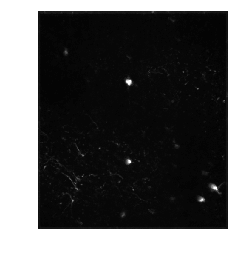

In [16]:
plt.imshow(dataset.max_projection,cmap='gray')
plt.axis('off')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.5:** Plot the dF/F trace for a cell by indexing into the dff_traces array

<p>Get the timestamps for 2P acquisition frames and plot the dF/F trace in seconds

</div>

In [17]:
# pick a cell 
cell_index = 8

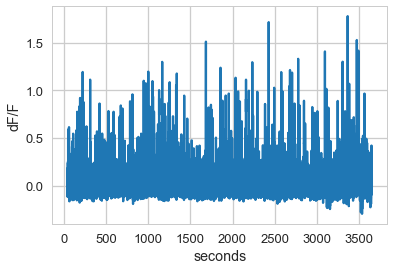

In [18]:
plt.plot(dataset.timestamps_ophys,dataset.dff_traces[cell_index])
plt.xlabel('seconds')
plt.ylabel('dF/F')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.6:** Get the cell_specimen_id for your cell index
</div>

In [19]:
cell_specimen_id = dataset.get_cell_specimen_id_for_cell_index(cell_index)
print cell_specimen_id

702210082


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.7:** Plot the roi mask for that cell using the roi_dict or roi_mask_array. Note whether you need to use the cell_specimen_id or cell_index
</div>

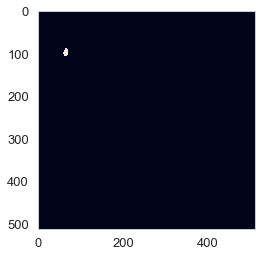

In [20]:
# use cell_specimen_id for roi_dict
plt.imshow(dataset.roi_masks[str(cell_specimen_id)])
plt.grid('off')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Change detection task - stimulus flashes and trials </h2>
<p>The change detection task consists of a series of image presentations. Each image flash is 250ms followed by 500ms of gray screen. The task for the mouse is to lick in a 750ms response window following a change in image identity. 
<p>On each trial, a change time is scheduled. On go trials, a change in image identity occurs. On catch trials, no image change occurs (aka 'sham change'), and we measure false alarm rates in the same 750ms response window. 
with changes in image identity occuring 

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.1:** Use the visual_behavior package to load trial records. What images were shown in this behavior session? How many trials were there? How many of those trials had stimulus changes ('go' trials)?
</div>

In [21]:
trials = dataset.trials
trials.head()

,trial,original_trial_index,auto_rewarded,change_contrast,change_frame,change_image_category,change_image_name,change_ori,change_time,cumulative_reward_number,...,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
0,0,41,False,1.0,5443.0,im031,im031,90.0,141.62952,5,...,0,2P6,catch,"[5550, 5568, 5577]",[],0,NaN,2.323682,0.0,yellow
1,1,54,None,1.0,7288.0,im075,im075,90.0,172.40470,5,...,0,2P6,go,"[7343, 7350]",[],0,NaN,1.519670,0.0,lightgreen
2,2,55,None,1.0,7558.0,im000,im000,90.0,176.90832,5,...,0,2P6,go,"[7608, 7619]",[],0,NaN,1.823604,0.0,lightgreen
3,3,56,None,1.0,7828.0,im075,im075,90.0,181.41204,5,...,0,2P6,go,"[8101, 8111]",[],0,NaN,1.744029,0.0,lightgreen
4,4,57,None,1.0,8323.0,im035,im035,90.0,189.66878,5,...,0,2P6,go,"[8554, 8562, 8574]",[],0,NaN,1.782929,0.0,lightgreen


In [22]:
images = trials.change_image_name.unique()[1:]
print images

['im075' 'im000' 'im035' 'im045' 'im073' 'im106' 'im054']


In [23]:
print 'number of trials =',len(trials)

number of trials = 298


In [24]:
print 'number of change trials =',len(trials[trials.trial_type=='go'])

number of change trials = 258


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.2:** Plot the behavioral response rate for each image separately for go and catch trials. 

<p> (Hint: use the trials dataframe column 'response' to quantify the number of trials where the mouse emitted a lick for each condition)
</div>

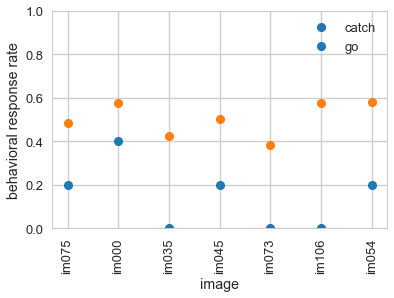

In [25]:
colors = sns.color_palette()
trial_types = trials.trial_type.unique()
for t,trial_type in enumerate(trial_types):
    for i,image in enumerate(images): 
        responses = trials[(trials.change_image_name==image)&(trials.trial_type==trial_type)].response
        response_rate = np.sum(responses)/float(len(responses))
        plt.plot(i,response_rate,'o',color=colors[t],label=trial_type)
plt.ylabel('behavioral response rate')
plt.xlabel('image')
plt.xticks(np.arange(0,len(images),1),images,rotation=90)
plt.ylim(0,1)
plt.legend(trial_types)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 3.3:** Use the visual_behavior package to load stimulus flash records. How many individual stimulus presentations were there?   
</div>

In [26]:
flashes = dataset.visual_stimuli
flashes.head()

,flash_num,frame,end_frame,time,duration,image_category,image_name,orientation,contrast
0,0,1,16,0.001206,51.054434,im045,im045,None,None
45,1,46,61,0.751357,51.054893,im045,im045,None,None
90,2,91,106,1.501783,51.055077,im045,im045,None,None
135,3,136,151,2.252362,51.055058,im045,im045,None,None
180,4,181,196,3.002979,51.055091,im045,im045,None,None


In [27]:
print 'number of stimulus presentations =',len(flashes)

number of stimulus presentations = 4626


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>The ResponseAnalysis object </h2>
<p>The ResponseAnalysis class takes a VisualBehaviorDataset object and extracts cell responses for flashes and trials.  

<p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.1:** Generate and explore the ResponseAnalysis object. What is available to you? Use help to check the documentation, or look directly at the code to see what operations are performed. 
</div>

In [28]:
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis 

In [29]:
ra = ResponseAnalysis(dataset)

loading trial response dataframe
loading flash response dataframe


In [30]:
help(ResponseAnalysis)

Help on class ResponseAnalysis in module visual_behavior.ophys.response_analysis.response_analysis:

class ResponseAnalysis(__builtin__.object)
 |  Contains methods for organizing responses by trial or by individual visual stimulus flashes in a DataFrame.
 |  
 |  For trial responses, a segment of the dF/F trace for each cell is extracted for each trial in a +/-4 seconds window (the 'trial_window') around the change time.
 |  The mean response for each cell is taken in a 500ms window after the change time (the 'response_window').
 |  The trial_response_df also contains behavioral metadata such as lick times, running, reward rate, and initial and change stimulus names.
 |  
 |  For stimulus flashes, the mean response is taken in a 500ms window after each stimulus presentation (the 'response_window').
 |  The flash_response_df also contains metadata such as the time from last lick, time since last stimulus change, and mean running speed during each flash.
 |  
 |  Parameters
 |  --------

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.2:** What is in the response dataframe? What are the columns of response_df? 
</div>

In [31]:
rdf = ra.trial_response_df
rdf.keys()

Index([u'trial', u'cell', u'cell_specimen_id', u'trace', u'timestamps',
       u'mean_response', u'baseline_response', u'p_value', u'sd_over_baseline',
       u'running_speed_trace', u'running_speed_timestamps',
       u'mean_running_speed'],
      dtype='object')

In [32]:
rdf.head()

,trial,cell,cell_specimen_id,trace,timestamps,mean_response,baseline_response,p_value,sd_over_baseline,running_speed_trace,running_speed_timestamps,mean_running_speed
0,0,0,702210036,"[-0.00558749210192, -0.0313207615094, -0.03712...","[137.61052, 137.64281, 137.67511, 137.7074, 13...",0.228619,0.308678,4.789679e-03,2.760414,"[0.185068992225, -0.100276228285, 0.0568252058...","[137.62629, 137.64295, 137.65965, 137.67632, 1...",41.005266
1,1,0,702210036,"[0.0793868628479, 0.0583250239975, 0.083241889...","[168.38455, 168.41684, 168.44913, 168.48143, 1...",1.118120,0.261703,8.300277e-13,8.736023,"[7.0696388214, 7.86373704671, 8.94967647697, 1...","[168.40139, 168.41802, 168.43476, 168.45146, 1...",17.853531
2,2,0,702210036,"[0.744734324558, 0.724572297818, 0.64035476221...","[172.90544, 172.93774, 172.97003, 173.00232, 1...",0.063605,0.037794,9.463483e-02,1.918284,"[0.380742936796, 0.555876227391, 0.35094738222...","[172.90506, 172.92176, 172.93842, 172.95509, 1...",36.194676
3,3,0,702210036,"[0.00709478193187, 0.0413235147505, 0.02184670...","[177.39406, 177.42635, 177.45864, 177.49093, 1...",0.060522,0.054498,6.524245e-01,1.773138,"[2.13847565343, 2.13463292368, 2.09483803984, ...","[177.40872, 177.4254, 177.44211, 177.45875, 17...",69.927051
4,4,0,702210036,"[-0.0575129665706, -0.0228988412914, 0.0505110...","[185.66088, 185.69317, 185.72546, 185.75776, 1...",0.056541,-0.017206,6.792699e-05,1.606266,"[3.91178834911, 3.90580320883, 3.98849460775, ...","[185.6655, 185.68219, 185.69888, 185.71553, 18...",69.985295


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.3:** Find the cell that has the largest mean_response. What image evoked the largest response? Was it a go or catch trial? 

<p>(Hint: use the 'trial' column value of trial_response_df to get metadata from the trials dataframe)

</div>

In [33]:
largest_response = rdf[rdf.mean_response==rdf.mean_response.max()]
largest_response

,trial,cell,cell_specimen_id,trace,timestamps,mean_response,baseline_response,p_value,sd_over_baseline,running_speed_trace,running_speed_timestamps,mean_running_speed
1717,227,5,702210056,"[-0.00751968473553, -0.0782659828099, -0.01671...","[2965.93901, 2965.9713, 2966.0036, 2966.0359, ...",2.519428,1.275701,2.424546e-08,4.541737,"[-0.342851690862, -0.34285169086, 0.1223877049...","[2965.93873, 2965.95543, 2965.97213, 2965.9888...",26.390383


In [34]:
cell = largest_response.cell.values[0]
print 'cell with largest response:',cell

cell with largest response: 5


In [35]:
trial = largest_response.trial.values[0]
print 'trial that evoked largest response for this cell:',trial

trial that evoked largest response for this cell: 227


In [36]:
trial_data = dataset.trials[dataset.trials.trial==trial]
trial_data

,trial,original_trial_index,auto_rewarded,change_contrast,change_frame,change_image_category,change_image_name,change_ori,change_time,cumulative_reward_number,...,number_of_rewards,rig_id,trial_type,lick_frames,reward_licks,reward_lick_count,reward_lick_latency,reward_rate,response,color
227,227,1003,None,1.0,174978.0,im031,im031,90.0,2969.94201,131,...,1,2P6,go,"[175020, 175030, 175038, 175046, 175053, 17506...","[0.16678, 0.30025, 0.43376, 0.55044, 0.68388, ...",17,0.16678,2.437029,1.0,darkgreen


In [37]:
image = trial_data.change_image_name.values[0]
print 'image:', image
trial_type = trial_data.trial_type.values[0]
print 'trial_type:',trial_type

image: im031
trial_type: go


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.4:** plot that image using stimulus template
</div>

In [38]:
######################### add this #########################

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.4:** Get the dF/F response traces for all trials of that image for that cell and assign to a variable called traces

<p>Hint: make sure to extract the an array of the values of response, not as a series
</div>

In [39]:
image_trials = trials[trials.change_image_name==image].trial.values

In [40]:
traces = rdf[(rdf.cell==cell)&(rdf.trial.isin(image_trials))].trace
traces

1490    [0.0267953045018, 0.022629588786, 0.0108146865...
1497    [0.115638025758, 0.167535336392, 0.10692374323...
1511    [0.0522631603892, 0.0658284993328, 0.031788970...
1520    [0.292547320321, 0.36684084512, 0.371248005745...
1539    [0.145579599934, 0.0419478661446, 0.0245537880...
1547    [0.0531719580653, -0.0541743775039, 0.09123346...
1549    [-0.00374163845529, 0.0195514080135, -0.003264...
1557    [-0.0716006133092, 0.0209862954581, 0.01367773...
1568    [0.029726983044, 0.0785641750057, 0.0091541462...
1571    [0.305995437724, 0.391122262305, 0.48696897116...
1577    [0.519342261386, 0.629263628783, 0.70912768177...
1598    [1.51677676843, 1.4659088694, 1.27227576505, 1...
1599    [0.0654784157475, 0.0864132290635, 0.114741660...
1611    [0.00359306170458, -0.0209896244354, 0.0910736...
1621    [0.0611368550142, -0.0761496917478, -0.0546044...
1622    [0.0736642516545, 0.15130176978, 0.16796221513...
1635    [-0.0817082514213, -0.0713869749113, -0.123367...
1640    [-0.02

In [41]:
traces = traces.values

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.5:** Plot the mean trace for all trials of a given image

<p>Use the povided plotting function to plot the trial averaged response trace to the preferred image for your cell
</div>

In [42]:
def plot_mean_trace(traces):
    fig,ax = plt.subplots()
    if len(traces) > 0:
        trace = np.mean(traces,axis=0)
        times = np.arange(0, len(trace), 1)
        sem = (traces.std()) / np.sqrt(float(len(traces)))
        ax.plot(trace,linewidth=3)
        ax.fill_between(times, trace + sem, trace - sem, alpha=0.5)
        ax.set_ylabel('dF/F')
        ax.set_xlabel('ophys frames')
    sns.despine(ax=ax)
    return ax

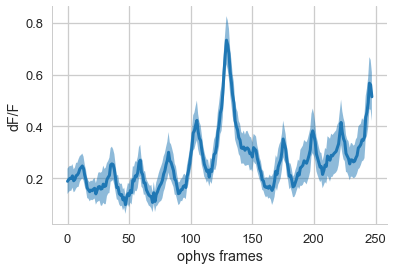

In [43]:
plot_mean_trace(traces)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 4.6:** Plot a tuning curve 

<p> Plot the trial averaged mean_response for each image for your cell
</div>

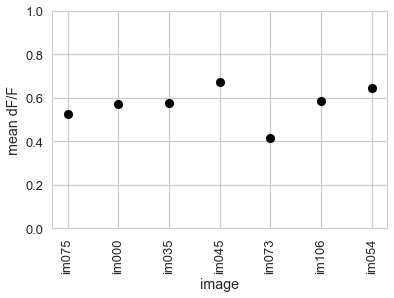

In [44]:
for i,image in enumerate(images): 
    image_trials = trials[trials.change_image_name==image].trial.values
    responses = rdf[(rdf.cell==cell)&(rdf.trial.isin(image_trials))].mean_response
    mean_response = responses.mean()
    plt.plot(i,mean_response,'o',color='k')
    plt.ylabel('mean dF/F')
    plt.xlabel('image')
    plt.xticks(np.arange(0,len(images),1),images,rotation=90)
    plt.ylim(0,1)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Decoding image identity from neural activity </h2>
<p>Some scikit-learn stuff...
</div>